In [1]:
import requests
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

weather_data_df = pd.DataFrame([])

for y in range(2015,2021):
    weather_url = f'http://spreadtrends.com/api/nfl/games/{y}?format=json'
    weather_results = requests.get(weather_url).json()
    temp_weather_df = pd.json_normalize(weather_results, record_path = ['results'])
    weather_data_df = weather_data_df.append(temp_weather_df)

# create dataframe of the columns we want to analyze

weather_data_df = weather_data_df[['gameId', 'season', 'type','surface', 'temperature', 'conditions', 'windSpeed']]

# filter out all game types other than 'Regular'
#weather_df = weather_df.loc[weather_df['type'] == 'Regular']

weather_data_df.to_csv('weather_data.csv')

In [2]:
weather_data_df

,gameId,season,type,surface,temperature,conditions,windSpeed
0,3854,2015,SuperBowl,Grass,76.0,clear sky,16.0
1,3853,2015,Playoff-CONF,Grass,37.0,clear sky,3.5
2,3852,2015,Playoff-CONF,Grass,37.0,mostly cloudy,5.8
3,3849,2015,Playoff-DIV,Grass,37.9,partly cloudy,12.7
4,3850,2015,Playoff-DIV,Grass,46.4,scattered clouds,6.9
...,...,...,...,...,...,...,...
264,4931,2020,Regular,Grass,81.0,clear sky,5.0
265,4932,2020,Regular,Turf-Dome,71.0,partly cloudy,14.0
266,4933,2020,Regular,Turf-Roof,80.0,cloudy,7.0
267,4934,2020,Regular,Turf,70.0,partly cloudy,8.0


In [3]:
# loop through all weeks in the season and create data frame with stats

player_stats_data_df = pd.DataFrame([])

for y in range(2015,2021):
    for x in range(1,18):
        stats_url = f'http://spreadtrends.com/api/nfl/games/{y}/{x}/stats?format=json'
        stats_results = requests.get(stats_url).json()
        temp_df = pd.json_normalize(stats_results, record_path = ['results'])
        player_stats_data_df = player_stats_data_df.append(temp_df)
    
#create a csv file


player_stats_data_df.to_csv('player_game_stats.csv')


In [4]:
player_stats_data_df

,gameId,season,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,passTds,ints,sacks,sackYds,rush,rushYds,rushTds,rec,recYds,recTds
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,1,0,7,41,0,0,0,0
1,3603,2015,1,Hyde,C,RB,28,Vikings,49ers,0,...,0,0,0,0,26,168,2,2,14,0
2,3603,2015,1,Bush,R,RB,25,Vikings,49ers,0,...,0,0,0,0,2,8,0,0,0,0
3,3603,2015,1,Hayne,Jarryd,RB,0,Vikings,49ers,0,...,0,0,0,0,4,13,0,1,7,0
4,3603,2015,1,Celek,G,TE,81,Vikings,49ers,0,...,0,0,0,0,0,0,0,3,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,5463,2020,17,Sims Jr.,Steven,WR,15,Eagles,Washington,0,...,0,0,0,0,1,18,0,1,6,0
336,5463,2020,17,Gibson,Antonio,WR,24,Eagles,Washington,0,...,0,0,0,0,19,75,0,1,6,0
337,5463,2020,17,Sims,Cam,WR,89,Eagles,Washington,0,...,0,0,0,0,0,0,0,5,43,0
338,5463,2020,17,McKissic,J.D.,WR,30,Eagles,Washington,0,...,0,0,0,0,2,0,0,5,30,0


In [5]:
# QB Rating cacluation

A = ((player_stats_data_df['comp'] / player_stats_data_df['att'])-.3)*5
B = ((player_stats_data_df['passYds'] / player_stats_data_df['att'])-3)*.25
C = ((player_stats_data_df['passTds'] / player_stats_data_df['att']))*20
D = (2.375 - ((player_stats_data_df['ints'] / player_stats_data_df['att'])*25))

qb_rating = ((A + B + C + D)/6)*100

In [6]:
player_stats_data_df['QB Rating'] = qb_rating

In [7]:
# combine the weather data and the player stat data for all games
combined_player_stats_weather_df = player_stats_data_df.merge(weather_data_df, how='left', on='gameId')

In [14]:
combined_player_stats_weather_df.loc[combined_player_stats_weather_df['type'] == 'Regular']
combined_player_stats_weather_df.to_csv('data_resources/combined_playerStats_weatherData.csv')

In [15]:
qb_stats_df = combined_player_stats_weather_df.loc[combined_player_stats_weather_df['position'] == 'QB']
qb_stats_df.head()


,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,36,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.1
22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,34,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.0
32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,19,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.8
42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,40,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.5


In [17]:
qb_stats_df['surface'].value_counts()



Grass         1925
Turf           796
Turf-Dome      420
Turf-Roof      398
Grass-Roof     120
Grass-Dome      20
Name: surface, dtype: int64

In [20]:
qb_stats_df = qb_stats_df.loc[(qb_stats_df['surface'] == 'Grass') | (qb_stats_df['surface'] == 'Turf')]
qb_stats_df

,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,26,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.20
11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,36,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.10
22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,34,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.00
32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,19,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.80
42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,40,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32384,5467,2020,17,Wilson,R,QB,3,49ers,Seahawks,36,...,0,0,0,87.847222,2020,Regular,Grass,57.0,broken clouds,4.70
32394,5456,2020,17,Rudolph,Mason,QB,2,Browns,Steelers,39,...,0,0,0,89.155983,2020,Regular,Grass,39.0,overcast clouds,6.93
32395,5456,2020,17,Dobbs,Joshua,QB,5,Browns,Steelers,5,...,0,0,0,70.416667,2020,Regular,Grass,39.0,overcast clouds,6.93
32436,5463,2020,17,Smith,A,QB,11,Eagles,Washington,32,...,0,0,0,75.260417,2020,Regular,Grass,38.0,light rain,10.29


In [34]:
# remove all rows with less than 10 pass attempts

qb_stats_df.drop(qb_stats_df[qb_stats_df['att'] < 10].index, inplace = True)

In [37]:
qb_stats_df.sort_values(['QB Rating'], ascending=True)

,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,att,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
13939,4276,2017,11,Peterman,Nathan,QB,18,Chargers,Bills,14,...,0,0,0,-91.369048,2017,Regular,Grass,76.0,partly cloudy,6.00
2785,3730,2015,10,Manning,P,QB,18,Chiefs,Broncos,20,...,0,0,0,-53.125000,2015,Regular,Grass,45.0,scattered clouds,6.90
32320,5453,2020,17,Walker,Phillip,QB,8,Saints,Panthers,14,...,0,0,0,-29.166667,2020,Regular,Grass,57.0,broken clouds,6.93
16268,4394,2018,1,Peterman,Nathan,QB,18,Ravens,Bills,18,...,0,0,0,-15.509259,2018,Regular,Turf,61.0,rain,12.00
20583,4585,2018,14,Sanchez,M,QB,6,Giants,Washington,14,...,0,0,0,-10.416667,2018,Regular,Grass,33.0,overcast,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17253,4442,2018,4,Trubisky,Mitchell,QB,10,Buccaneers,Bears,26,...,0,0,0,196.634615,2018,Regular,Grass,65.0,overcast,10.29
19315,4524,2018,10,Roethlisberger,B,QB,7,Panthers,Steelers,25,...,0,0,0,196.750000,2018,Regular,Grass,36.0,clear sky,5.82
294,3600,2015,1,Mariota,M,QB,8,Buccaneers,Titans,16,...,0,0,0,207.552083,2015,Regular,Grass,84.9,mostly cloudy,6.90
2001,3683,2015,7,Tannehill,R,QB,17,Texans,Dolphins,19,...,0,0,0,213.048246,2015,Regular,Grass,82.0,overcast,16.10


In [38]:
# create qb_weather csv
qb_stats_df.to_csv('QB Stats and Weather Data.csv')

Text(0, 0.5, 'QB Rating')

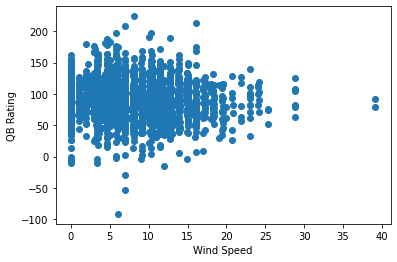

In [39]:
x_axis = qb_stats_df['windSpeed']
y_axis = qb_stats_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Wind Speed')
plt.ylabel('QB Rating')

Text(0, 0.5, 'QB Rating')

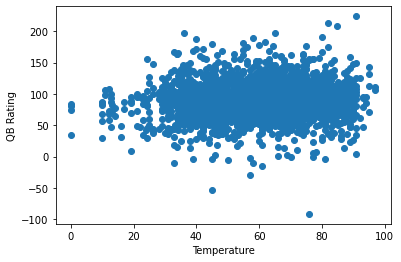

In [40]:
x_axis = qb_stats_df['temperature']
y_axis = qb_stats_df['QB Rating']

plt.scatter(x_axis, y_axis)
plt.xlabel('Temperature')
plt.ylabel('QB Rating')